In [24]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
import csv
from zipfile import ZipFile
from datetime import datetime
from sklearn import preprocessing


In [2]:
Test=pd.read_excel('Test.xlsx',sheet_name='Sheet1')
Train=pd.read_excel('Train.xlsx',sheet_name='Sheet1')

In [3]:
# Create a new column 'Name' in Test dataset with M if male or F if feminine 
Test['Sex'] = Test['Name'].str.split(". ").str[0].apply(lambda x: 'M' if x == 'Mr' else 'F')
Test.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Sex
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0,M
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0,F
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0,M
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827,M
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0,M


In [4]:
# Create a new column 'Name' in Train dataset with M if male or F if feminine
Train['Sex'] = Train['Name'].str.split(". ").str[0].apply(lambda x: 'M' if x == 'Mr' else 'F')

In [5]:
Train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Sex
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,M
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,M
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,M
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,M
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,M


## First phase

Identify the people who belong to each class. 

In [7]:
# Create a new column 'Group' in the train dataset
groups = []
for i in range(len(Train)):
    if Train['Money Received'][i] > 0:
        groups.append('B')
    elif Train['Ticket Price'][i] > 0:
        groups.append('C')
    else:
        groups.append('A')
Train['Group'] = groups
Train

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Sex,Group
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,M,C
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,M,A
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,M,C
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,M,B
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,M,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,F,A
22396,34882,Mr. Julian Coleman,"March 7,2025",Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,0,0,M,A
22397,34883,Miss Amelia Walker,"July 20,2022",Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,2674,0,0,F,B
22398,34884,Mr. Justin Sutherland,"June 11,2011",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Repair & constructions,90,0,0,1,M,A


In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
 15  Se

In [22]:
Train.isnull().any()

CITIZEN_ID                False
Name                      False
Birthday                  False
Native Continent          False
Marital Status            False
Lives with                False
Base Area                 False
Education Level           False
Years of Education        False
Employment Sector         False
Role                      False
Working Hours per week    False
Money Received            False
Ticket Price              False
Income                    False
Sex                       False
Group                     False
dtype: bool

In [10]:
Train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


In [61]:
# Are all the features commensurate ?
# Non categorical features normalization 
non_cat = Train[['Years of Education', 'Working Hours per week','Money Received', 'Ticket Price']]
non_cat = preprocessing.normalize(non_cat)
non_cat = pd.DataFrame(non_cat)
non_cat = non_cat.rename(columns={0: "Years of Education", 1: "Working Hours per week", 2: 'Money Received', 3:'Ticket Price'  })
non_cat

,Years of Education,Working Hours per week,Money Received,Ticket Price
0,0.005718,0.017595,0.000000,0.999829
1,0.287348,0.957826,0.000000,0.000000
2,0.005169,0.019815,0.000000,0.999790
3,0.002039,0.006858,0.999974,0.000000
4,0.422885,0.906183,0.000000,0.000000
...,...,...,...,...
22395,0.287348,0.957826,0.000000,0.000000
22396,0.324324,0.945946,0.000000,0.000000
22397,0.006357,0.014957,0.999868,0.000000
22398,0.175033,0.984563,0.000000,0.000000


# Feature Selection

## Pearson Correlation

Correlation between non-categorical variables.

In [62]:
cor_pearson = non_cat.corr()
cor_pearson

,Years of Education,Working Hours per week,Money Received,Ticket Price
Years of Education,1.000000,0.478799,-0.525817,-0.386612
Working Hours per week,0.478799,1.000000,-0.753991,-0.553625
Money Received,-0.525817,-0.753991,1.000000,-0.066416
Ticket Price,-0.386612,-0.553625,-0.066416,1.000000


In [44]:
# Correlation between non-categorical variables
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

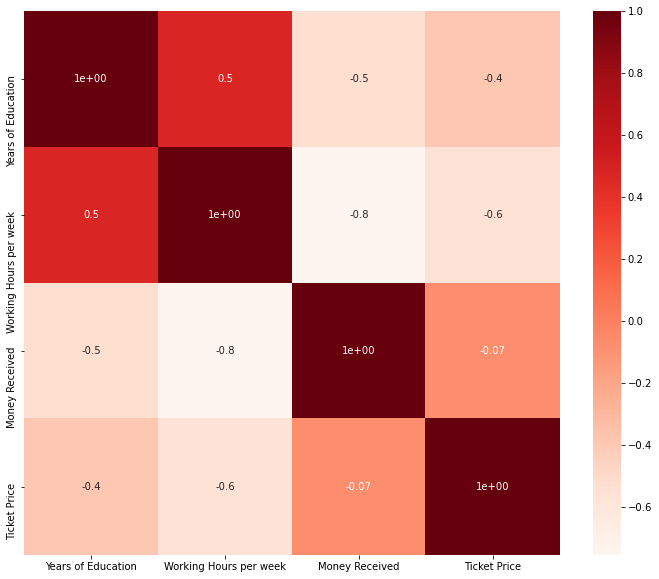

In [63]:
cor_pearson = non_cat.corr()
cor_heatmap(cor_pearson)

## Spearman Correlation

In [65]:
cor_spearman=non_cat.corr(method='spearman')
cor_spearman

,Years of Education,Working Hours per week,Money Received,Ticket Price
Years of Education,1.000000,-0.317266,-0.473544,-0.309165
Working Hours per week,-0.317266,1.000000,-0.473023,-0.310270
Money Received,-0.473544,-0.473023,1.000000,-0.066310
Ticket Price,-0.309165,-0.310270,-0.066310,1.000000


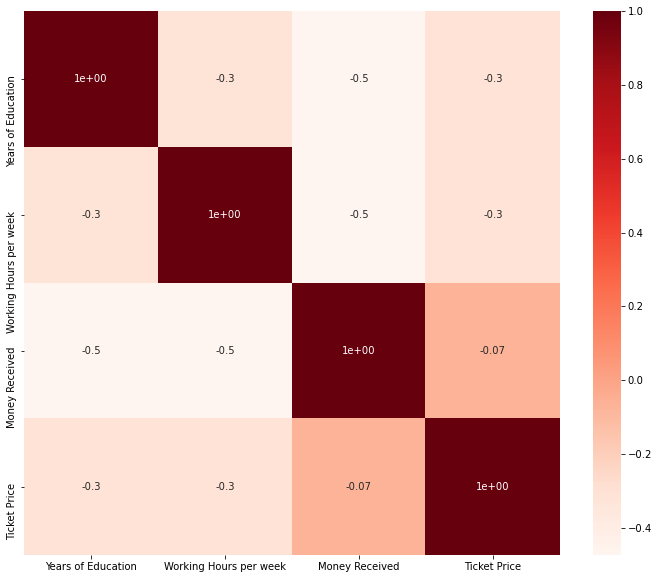

In [66]:
cor_heatmap(cor_spearman)

## Visualize the weight of the dependent variable in categorical data
### MIC

In [12]:
target = Train['Income']

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(Train, target, test_size=0.25, stratify = target, random_state=5)

In [18]:
modelNB = GaussianNB()